In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor


C:\Users\dsant\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\dsant\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\dsant\AppData\Local\Temp\ipykernel_26168\1398525150.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_excel("temps.xlsx")

In [4]:
df.head()

,year,month,day,week,temp_2,temp_1,average,actual
0,2016,1,1,Fri,45,45,45.6,45
1,2016,1,2,Sat,44,45,45.7,44
2,2016,1,3,Sun,45,44,45.8,41
3,2016,1,4,Mon,44,41,45.9,40
4,2016,1,5,Tues,41,40,46.0,44


In [5]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     348 non-null    int64  
 1   month    348 non-null    int64  
 2   day      348 non-null    int64  
 3   week     348 non-null    object 
 4   temp_2   348 non-null    int64  
 5   temp_1   348 non-null    int64  
 6   average  348 non-null    float64
 7   actual   348 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 21.9+ KB


### Transform days, its categorical and we'll change it to numeric

In [7]:
df = pd.get_dummies(df).astype(int)
#df[['week_Fri', 'week_Mon', 'week_Sat', 'week_Sun', 'week_Thurs', 'week_Tues', 'week_Wed']] = df[['week_Fri', 'week_Mon', 'week_Sat', 'week_Sun', 'week_Thurs', 'week_Tues', 'week_Wed']].astype(int)
df.head()

,year,month,day,temp_2,temp_1,average,actual,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45,45,1,0,0,0,0,0,0
1,2016,1,2,44,45,45,44,0,0,1,0,0,0,0
2,2016,1,3,45,44,45,41,0,0,0,1,0,0,0
3,2016,1,4,44,41,45,40,0,1,0,0,0,0,0
4,2016,1,5,41,40,46,44,0,0,0,0,0,1,0


### separating out x, the explanatory variables from your target with numpy

In [8]:
# TRansform in numpy array
labels = np.array(df["actual"])

features = df.drop("actual", axis=1)

feature_list = list(df.columns)

features = np.array(features)

### split data into training and testing

In [9]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.25, random_state=42)

#### Base line with Training with a mean

In [10]:
baseline_preds = test_features[:, feature_list.index("average")]

baseline_error = abs(baseline_preds - test_labels)

print("Baseline error average:", round(np.mean(baseline_error),2))

Baseline error average: 5.29


### RandomForestRegressor

In [11]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [12]:
prediction_rf = rf.predict(test_features)
error_rf = abs(prediction_rf - test_labels)

r_sq = rf.score(features, labels)
print("r^2:", r_sq)
print("MAE:", metrics.mean_absolute_error(test_labels, prediction_rf))
print("MSE:", metrics.mean_squared_error(test_labels, prediction_rf))

r^2: 0.930498628058757
MAE: 3.9938735632183913
MSE: 27.233255390804594


#### Mae is < than the average error -> the model is better

### AdaBoostRegressor

In [13]:
ada = AdaBoostRegressor(n_estimators = 100)

ada.fit(train_features, train_labels)

ada_pred = ada.predict(test_features)

In [14]:
error_ada = abs(ada_pred - test_labels)


r_sq_ada = ada.score(features, labels)
print("r^2:", r_sq_ada)
print("MAE:", metrics.mean_absolute_error(test_labels, ada_pred))
print("MSE:", metrics.mean_squared_error(test_labels, ada_pred))

r^2: 0.8753101188945722
MAE: 3.686053059258855
MSE: 23.741615293090465


### GradientBoostingRegressor

In [15]:
gbr = GradientBoostingRegressor(n_estimators = 100)

gbr.fit(train_features, train_labels)

gbr_pred = gbr.predict(test_features)

In [16]:
error_gbr = abs(gbr_pred - test_labels)


r_sq_gbr = gbr.score(features, labels)
print("r^2:", r_sq_ada)
print("MAE:", metrics.mean_absolute_error(test_labels, gbr_pred))
print("MSE:", metrics.mean_squared_error(test_labels, gbr_pred))

r^2: 0.8753101188945722
MAE: 3.9766538672232623
MSE: 29.030349165783853


### After comparing the three models, the one that performed best above was: AdaBoostRegressor

## Tree representation - Randon Forest

In [17]:
!pip install pydot



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import pandas as pd
from sklearn import tree
from sklearn.tree import export_graphviz
import pydot

rf = RandomForestRegressor(max_depth=3)
rf.fit(train_features, train_labels)

# Selecting one of the trees from the random forest, for example, the 5th tree
tree = rf.estimators_[5]

tree

export_graphviz(tree, out_file="tree.dot", feature_names = feature_list, rounded = True, precision = 1)
(graph,) = pydot.graph_from_dot_file("tree.dot")  # A vírgula após (graph,) é importante para descompactar a lista corretamente
graph.write_png("tree.png")  # Acesse o primeiro elemento da lista e chame write_png() nele



ValueError: Length of feature_names, 14 does not match number of features, 13

### Defining the most important variable - Forest

In [19]:
importances = list(rf.feature_importances_)

feature_importance = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

feature_importance = sorted(feature_importance, key = lambda X : X[1], reverse = True)

[print("Feature: {:20} Importance {}".format(*pair)) for pair in feature_importance]

Feature: temp_1               Importance 0.85
Feature: average              Importance 0.12
Feature: temp_2               Importance 0.02
Feature: month                Importance 0.01
Feature: year                 Importance 0.0
Feature: day                  Importance 0.0
Feature: actual               Importance 0.0
Feature: week_Fri             Importance 0.0
Feature: week_Mon             Importance 0.0
Feature: week_Sat             Importance 0.0
Feature: week_Sun             Importance 0.0
Feature: week_Thurs           Importance 0.0
Feature: week_Tues            Importance 0.0


[None, None, None, None, None, None, None, None, None, None, None, None, None]

### Defining the most important variable - ADA

In [20]:
importances = list(ada.feature_importances_)

feature_importance = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

feature_importance = sorted(feature_importance, key = lambda X : X[1], reverse = True)

[print("Feature: {:20} Importance {}".format(*pair)) for pair in feature_importance]

Feature: temp_1               Importance 0.56
Feature: average              Importance 0.22
Feature: temp_2               Importance 0.08
Feature: month                Importance 0.06
Feature: day                  Importance 0.03
Feature: week_Fri             Importance 0.03
Feature: actual               Importance 0.01
Feature: week_Sat             Importance 0.01
Feature: year                 Importance 0.0
Feature: week_Mon             Importance 0.0
Feature: week_Sun             Importance 0.0
Feature: week_Thurs           Importance 0.0
Feature: week_Tues            Importance 0.0


[None, None, None, None, None, None, None, None, None, None, None, None, None]

### Defining the most important variable - GBR

In [21]:
importances = list(gbr.feature_importances_)

feature_importance = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

feature_importance = sorted(feature_importance, key = lambda X : X[1], reverse = True)

[print("Feature: {:20} Importance {}".format(*pair)) for pair in feature_importance]

Feature: temp_1               Importance 0.67
Feature: average              Importance 0.25
Feature: day                  Importance 0.03
Feature: month                Importance 0.02
Feature: temp_2               Importance 0.02
Feature: year                 Importance 0.0
Feature: actual               Importance 0.0
Feature: week_Fri             Importance 0.0
Feature: week_Mon             Importance 0.0
Feature: week_Sat             Importance 0.0
Feature: week_Sun             Importance 0.0
Feature: week_Thurs           Importance 0.0
Feature: week_Tues            Importance 0.0


[None, None, None, None, None, None, None, None, None, None, None, None, None]

### Actual vs. Predicted View - Random Forest

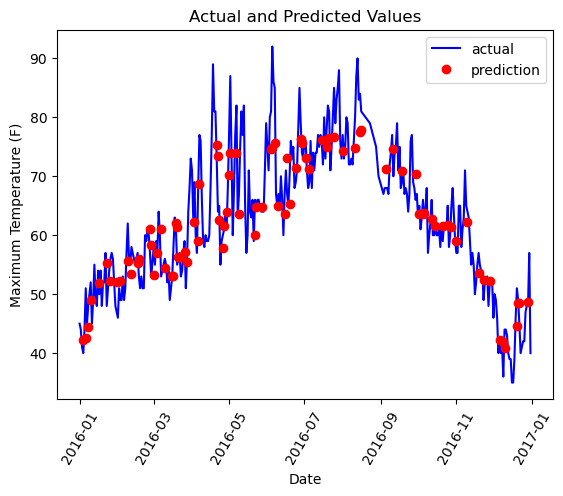

In [23]:
import datetime
import matplotlib.pyplot as plt
# Dates of training values
predictions_rf = rf.predict(test_features)
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]
# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})
# Dates of predictions
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]
# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions_rf})
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');

### Actual vs. Predicted View - ADA BOOST

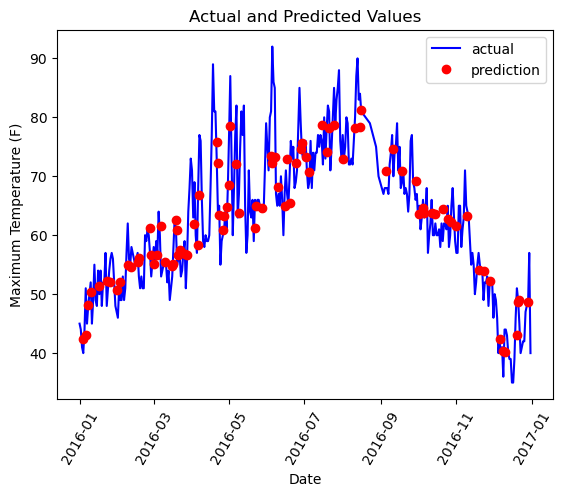

In [24]:
import datetime
import matplotlib.pyplot as plt
# Dates of training values
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]
# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})
# Dates of predictions
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]
# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': ada_pred})
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');

### Actual vs. Predicted View - Gradient Boost

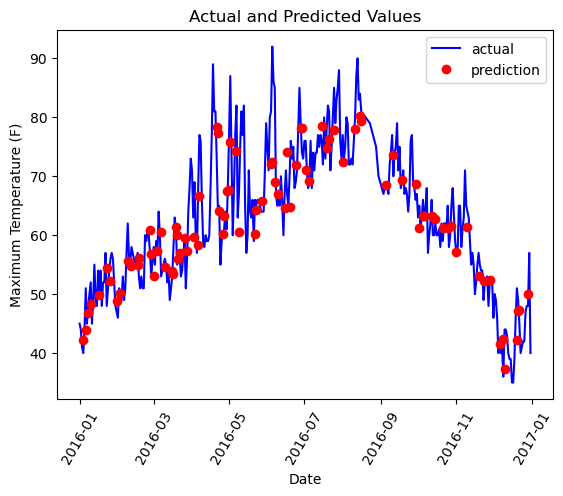

In [25]:
import datetime
import matplotlib.pyplot as plt
# Dates of training values
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]
# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})
# Dates of predictions
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]
# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': gbr_pred})
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');

### Gradient Descent

In [26]:
from time import time
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error


reg_ridge = LinearRegression()
for size in [10**i for i in range(3,6)]:
    prob=make_regression(n_samples=size,n_features=800, n_informative=545,noise=1.0,random_state=101)
    X,y=prob
    y=y.reshape(size,1)
    print("Size of the problem: ",X.shape)
    t1 = time()
    reg_ridge.fit(X,y)
    t2 = time()
    t_delta=round(1e3*(t2-t1),3)
    print(f"Took {t_delta} milliseconds")
    rmse = mean_squared_error(y,reg_ridge.predict(X), squared=True)
    print("RMSE:", rmse)
    print()

Size of the problem:  (1000, 800)
Took 1079.693 milliseconds
RMSE: 0.21852862781604582

Size of the problem:  (10000, 800)
Took 1512.229 milliseconds
RMSE: 0.9056849032298898

Size of the problem:  (100000, 800)
Took 8855.548 milliseconds
RMSE: 0.9884991938817962

